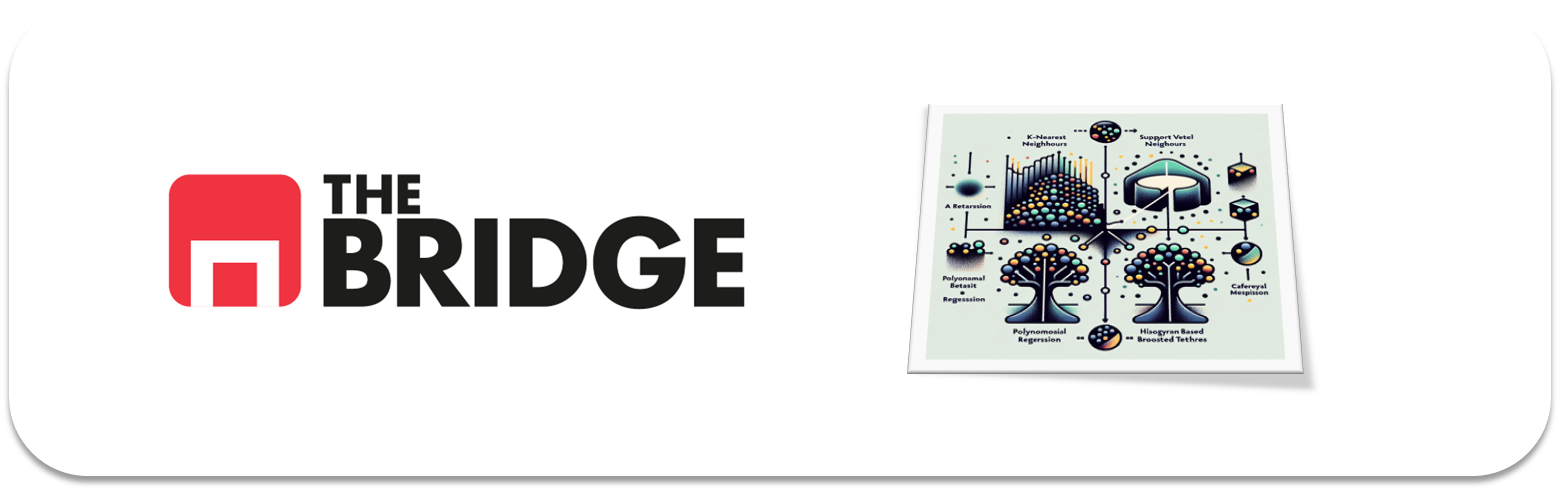

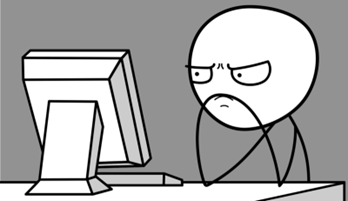

Para ejercitarte y afianzar lo aprendido sobre **Otros Modelos de aprendizaje supervisado**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [80]:
import pandas as pd
import numpy as np



## PARTE 1. KNN

En la primera parte  vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating (ojo, no el sentimiento), en función del sentimiento del comentario y su valor y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

### Ejercicio 1

Lee el archivo de entrada "reviews_sentiment.csv" y carga su contenido en un dataframe. Muestras sus primeras líneas, su información general y define una variable "target" asignándole el nombre de la columna que contenga el target del problema. 

In [81]:
data = pd.read_csv('./data/reviews_sentiment.csv',sep=';')
data

Review Title  \
0                  Sin conexión   
1                  faltan cosas   
2    Es muy buena lo recomiendo   
3               Version antigua   
4                     Esta bien   
..                          ...   
252        Muy buena aplicacion   
253                       Buena   
254                        Wuau   
255                   Muy buena   
256                       Sg S5   

                                           Review Text  wordcount  \
0    Hola desde hace algo más de un mes me pone sin...         23   
1                   Han mejorado la apariencia pero no         20   
2                                 Andres e puto amoooo          4   
3    Me gustana mas la version anterior esta es mas...         17   
4                      Sin ser la biblia.... Esta bien          6   
..                                                 ...        ...   
252                                   Muy buena genial          3   
253                                             Genial          1   
254                                             Genial          1   
255                                             Genial          1   
256                                 Excelente y exacta          3   

    titleSentiment textSentiment  Star Rating  sentimentValue  
0         negative      negative            1       -0.486389  
1         negative      negative            1       -0.586187  
2              NaN      negative            1       -0.602240  
3              NaN      negative            1       -0.616271  
4         negative      negative            1       -0.651784  
..             ...           ...          ...             ...  
252       positive      positive            5        2.814818  
253       positive      positive            5        2.924393  
254       positive      positive            5        2.924393  
255       positive      positive            5        2.924393  
256       negative      positive            5        3.264579  

[257 rows x 7 columns]

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


### Ejericicio 2

Muestra la distribución del target y coméntala brevemente.

In [83]:
target = data['Star Rating']
target.value_counts(normalize=True)

Star Rating
5    0.342412
3    0.303502
1    0.143969
4    0.116732
2    0.093385
Name: proportion, dtype: float64

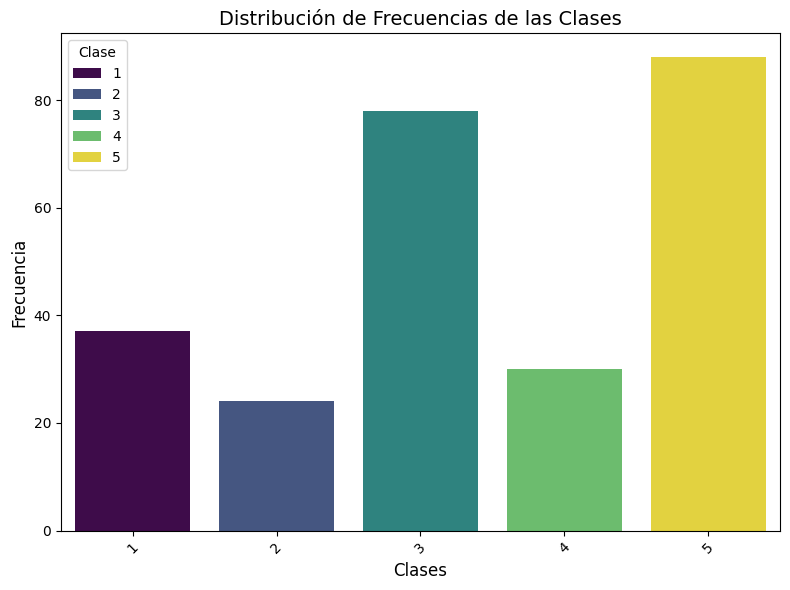

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las frecuencias de las clases
class_counts = data['Star Rating'].value_counts()

# Crear un DataFrame para facilitar la visualización con Seaborn
freq_df = class_counts.reset_index()
freq_df.columns = ['Clase', 'Frecuencia']

# Plotear la distribución de frecuencias
plt.figure(figsize=(8, 6))
sns.barplot(x='Clase', y='Frecuencia', data=freq_df, palette='viridis', hue='Clase')
plt.title('Distribución de Frecuencias de las Clases', fontsize=14)
plt.xlabel('Clases', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ejercicio 3

Deshazte de la columna "titleSentiment" que tiene nulos y no vamos a emplearla.

In [85]:
data.drop(columns=['titleSentiment'], inplace=True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   textSentiment   257 non-null    object 
 4   Star Rating     257 non-null    int64  
 5   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 12.2+ KB


### Ejercicio 4

Haz el split en train y test.

In [87]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [88]:
train.shape

(205, 6)

In [89]:
test.shape

(52, 6)

### Ejercicio 5

Muestra la descripción de las variables que consideres numéricas (justificando tu elección) y sus histogramas. ¿Hay que aplicar alguna transformación o tratamiento? (Recuerda que vamos a emplear un KNN)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 75 to 102
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    205 non-null    object 
 1   Review Text     205 non-null    object 
 2   wordcount       205 non-null    int64  
 3   textSentiment   205 non-null    object 
 4   Star Rating     205 non-null    int64  
 5   sentimentValue  205 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.2+ KB


In [91]:
train.describe()

wordcount  Star Rating  sentimentValue
count  205.000000   205.000000      205.000000
mean    11.209756     3.414634        0.400269
std     12.875341     1.389308        0.871054
min      1.000000     1.000000       -1.780889
25%      3.000000     3.000000       -0.106498
50%      7.000000     3.000000        0.244713
75%     15.000000     5.000000        0.813521
max    103.000000     5.000000        3.264579

array([[<Axes: title={'center': 'wordcount'}>,
        <Axes: title={'center': 'sentimentValue'}>]], dtype=object)

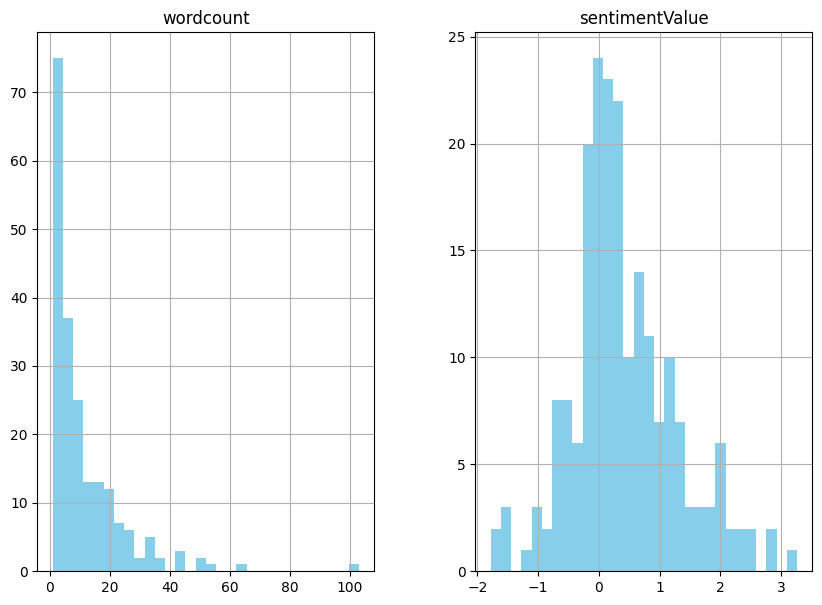

In [92]:
features_num = ['wordcount', 'sentimentValue']   

train[features_num].hist(bins=30, figsize=(10, 7), color='skyblue')

array([[<Axes: title={'center': 'wordcount'}>,
        <Axes: title={'center': 'sentimentValue'}>]], dtype=object)

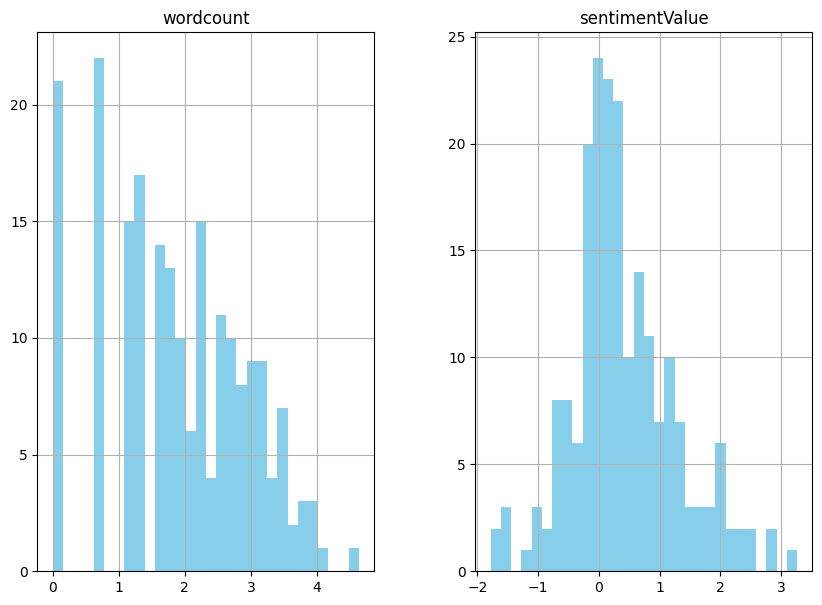

In [93]:
# transformación logarítmica de la variable wordcount
train['wordcount'] = train['wordcount'].apply(np.log) # aplicar logaritmo natural
test['wordcount'] = test['wordcount'].apply(np.log) # aplicar logaritmo natural

train[features_num].hist(bins=30, figsize=(10, 7), color='skyblue')


In [94]:
# estandarizar las variables numéricas
from sklearn.preprocessing import StandardScaler

# Crear el escalador y ajustarlo solo con los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(train[features_num])

# Transformar ambos conjuntos de datos con el mismo escalador entrenado
train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[features_num] = scaler.transform(train[features_num])
test_scaled[features_num] = scaler.transform(test[features_num])

In [95]:
test_scaled[features_num].describe()

wordcount  sentimentValue
count  52.000000       52.000000
mean    0.141669       -0.093392
std     0.980458        1.155107
min    -1.755827       -3.080511
25%    -0.730272       -0.758539
50%     0.240308       -0.085988
75%     0.859873        0.356468
max     2.286915        2.904875

### Ejercicio 6

Muestra la distribución frecuencial de las variables que consideres categóricas. ¿Habrías que hacerles algún tipo de tratamiento?

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 75 to 102
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    205 non-null    object 
 1   Review Text     205 non-null    object 
 2   wordcount       205 non-null    float64
 3   textSentiment   205 non-null    object 
 4   Star Rating     205 non-null    int64  
 5   sentimentValue  205 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.2+ KB


In [97]:
features_cat = ['textSentiment']
train[features_cat].value_counts(normalize=True)    

textSentiment
positive         0.839024
negative         0.160976
Name: proportion, dtype: float64

### Ejercicio 7

En un modelado completo habríamos comprobado la relación entre las features y el targer, para estos ejercicios, las vamos a incluir sí o si. Haz el tratamiento de features, haciendo la conversión ordinal de la binaria (usa 1 para positive y 0 para negative) y aplicando el escalado que creas más conveniente en consecuencia para las numéricas

In [98]:
# transformar valores categóricos a numéricos con ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

# Crear el codificador y ajustarlo solo con los datos de entrenamiento
categories = [['negative', 'positive']]
encoder = OrdinalEncoder(categories=categories)
train_scaled[features_cat] = encoder.fit_transform(train_scaled[features_cat])
test_scaled[features_cat] = encoder.fit_transform(test_scaled[features_cat])

In [99]:
train_scaled[features_cat].value_counts()

textSentiment
1.0              172
0.0               33
Name: count, dtype: int64

In [100]:
test_scaled[features_cat].value_counts()

textSentiment
1.0              39
0.0              13
Name: count, dtype: int64

### Ejercicio 8

Crea el juego X,y de train y test. Carga el modelo, instancialo con un k=5 para empezar y entrénalo.

In [101]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 75 to 102
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    205 non-null    object 
 1   Review Text     205 non-null    object 
 2   wordcount       205 non-null    float64
 3   textSentiment   205 non-null    float64
 4   Star Rating     205 non-null    int64  
 5   sentimentValue  205 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 11.2+ KB


In [102]:
X_train = pd.concat([train_scaled[features_num],train_scaled[features_cat]],axis=1)
X_test = pd.concat([test_scaled[features_num],test_scaled[features_cat]],axis=1)
X_train

wordcount  sentimentValue  textSentiment
75   -0.461721       -0.755392            1.0
178   0.185333        0.284492            1.0
38    1.129663       -0.399836            1.0
136   1.536032       -0.213742            1.0
60    0.185333       -0.585104            1.0
..         ...             ...            ...
106  -1.755827       -0.285834            1.0
14    0.707734       -1.707323            0.0
92   -0.461721       -0.437240            1.0
179  -1.108774        0.288313            1.0
102  -0.461721       -0.316647            1.0

[205 rows x 3 columns]

In [103]:
y_train = train['Star Rating']
y_test = test['Star Rating']

In [104]:
# modelo
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#instanciar el modelo con k=5
knn = KNeighborsClassifier(n_neighbors=3) # Instanciamos el clasificador con hiperparámetro k = 3; un valor bajo genera overfitting, un valor alto genera underfitting y mejor generalización

#entrenar el modelo
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Ejercicio 9

Evalúalo contra el propio train y contra test, ¿qué puedes decir de los resultados?

In [106]:
from sklearn.metrics import accuracy_score,classification_report

# Evaluación del modelo
train_preds = knn.predict(X_train)
test_preds = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Accuracy en train: {train_accuracy:.4f}')
print(f'Accuracy en test: {test_accuracy:.4f}')

# Reporte de clasificación
print("\nReporte de clasificación en train:")
print(classification_report(y_train, train_preds))

print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))

Accuracy en train: 0.9463
Accuracy en test: 0.8462

Reporte de clasificación en train:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        27
           2       0.92      1.00      0.96        22
           3       0.92      0.92      0.92        64
           4       0.95      0.87      0.91        23
           5       0.97      0.97      0.97        69

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205


Reporte de clasificación en test:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.40      1.00      0.57         2
           3       0.92      0.86      0.89        14
           4       1.00      0.57      0.73         7
           5       0.90      0.95      0.92        19

    accuracy                           0.85        52
   macro 

### Ejercicio 10

Vamos a "ajustar a mano" el valor de K, probando diferentes valores entre 1 y 20. Para ello haz un bucle que cambie el valor de K y obtenga mediante validación cruzada el valor del "balanced accuracy" para cada "modelo" y se quede con el k que mejor métrica obtenga. Luego entrena un modelo para ese k y evalúalo contra el target.

In [107]:
from sklearn.model_selection import cross_val_score

#  Buscar el mejor valor de k
best_k = None
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f'Mejor valor de k: {best_k} con balanced accuracy: {best_score:.4f}')

# Entrenar modelo con el mejor k encontrado
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Evaluación del modelo
train_preds = knn.predict(X_train)
test_preds = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Accuracy en train: {train_accuracy:.4f}')
print(f'Accuracy en test: {test_accuracy:.4f}')

# Reporte de clasificación
print("\nReporte de clasificación en train:")
print(classification_report(y_train, train_preds))

print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))


Mejor valor de k: 5 con balanced accuracy: 0.8756
Accuracy en train: 0.9171
Accuracy en test: 0.8654

Reporte de clasificación en train:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        27
           2       0.95      0.91      0.93        22
           3       0.85      0.94      0.89        64
           4       0.95      0.78      0.86        23
           5       0.96      0.93      0.94        69

    accuracy                           0.92       205
   macro avg       0.93      0.90      0.92       205
weighted avg       0.92      0.92      0.92       205


Reporte de clasificación en test:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.50      1.00      0.67         2
           3       0.85      0.79      0.81        14
           4       1.00      0.71      0.83         7
           5       0.95      0.95      0.95        19

    accuracy 

### Ejercicio 11

Repasa la ficha de KNN o la documentación de sklearn y, usando un grid y una estrategia completa (GridSearch), busca la mejor combinación de k y weights que puedas, empleando de nuevo "balanced_accuracy" como métrica.

In [108]:
from sklearn.model_selection import GridSearchCV

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance']
}

# Configurar el GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
best_score = grid_search.best_score_

print(f'Mejor valor de k: {best_k}, Mejor weights: {best_weights} con balanced accuracy: {best_score:.4f}')

# Entrenar modelo con los mejores hiperparámetros encontrados
knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
knn.fit(X_train, y_train)

# Evaluación del modelo
train_preds = knn.predict(X_train)
test_preds = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Accuracy en train: {train_accuracy:.4f}')
print(f'Accuracy en test: {test_accuracy:.4f}')

# Reporte de clasificación
print("\nReporte de clasificación en train:")
print(classification_report(y_train, train_preds))

print("\nReporte de clasificación en test:")
print(classification_report(y_test, test_preds))


Mejor valor de k: 9, Mejor weights: distance con balanced accuracy: 0.8774
Accuracy en train: 0.9902
Accuracy en test: 0.8846

Reporte de clasificación en train:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        22
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00        23
           5       0.99      0.99      0.99        69

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Reporte de clasificación en test:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.50      1.00      0.67         2
           3       1.00      0.79      0.88        14
           4       1.00      0.71      0.83         7
           5       0.90      1.00      0.95